In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


from sklearn import metrics
#import pandas_profiling

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor


import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline


from xgboost import XGBRegressor








In [25]:
Energy = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/Hamoye DS Internship - Spring '23/energydata_complete.csv")

In [26]:
Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [27]:
Energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [28]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [29]:
Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [23]:
Energy.shape

(19735, 29)

In [14]:
Energy.isnull()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [30]:
Energy.rename(columns = {'date':'Date', 'Appliances':'Appliances', 'lights':'Lights', 'T1':'Kitchen_Temp', 
                'RH_1':'Kitchen_Humid', 'T2':'Living_Room_Temp', 'RH_2':'Living_Room_Humid', 
                'T3':'Laundry_Room_Temp', 'RH_3':'Laundry_Room_Humid', 'T4':'Office_Room_Temp', 
                'RH_4':'Office_Room_Humid', 'T5':'Bathroom_Temp', 'RH_5':'Bathroom_Humid',
                'T6':'Temp_Outside', 'RH_6':'Outside_Temp_Humid', 'T7':'Iron_Room_Temp',
                'RH_7':'Iron_Room_Humid', 'T8':'Teen_Room_2_Temp', 'RH_8':'Teen_Room_2_Humid',
                'T9':'Parent_Room_Temp', 'RH_9':'Parent_Room_Humid', 'To':'Temp_Out_WS', 'Pressure':'Pressure_WS',
                'RH_out':'RH_Outside_WS', 'Wind speed':'Wind_Speed_WS', 'Visibility':'Visibility_WS', 'Tdewpoint':'Dewpoint_Temp_WS',
                'rv1':'Random_Var_1', 'rv2':'Random_Var_2'}, inplace = True)


In [31]:
Energy.head()

,Date,Appliances,Lights,Kitchen_Temp,Kitchen_Humid,Living_Room_Temp,Living_Room_Humid,Laundry_Room_Temp,Laundry_Room_Humid,Office_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humid,T_out,Press_mm_hg,RH_Outside_WS,Windspeed,Visibility_WS,Dewpoint_Temp_WS,Random_Var_1,Random_Var_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [32]:
Energy.isnull().sum() 

Date                  0
Appliances            0
Lights                0
Kitchen_Temp          0
Kitchen_Humid         0
Living_Room_Temp      0
Living_Room_Humid     0
Laundry_Room_Temp     0
Laundry_Room_Humid    0
Office_Room_Temp      0
Office_Room_Humid     0
Bathroom_Temp         0
Bathroom_Humid        0
Temp_Outside          0
Outside_Temp_Humid    0
Iron_Room_Temp        0
Iron_Room_Humid       0
Teen_Room_2_Temp      0
Teen_Room_2_Humid     0
Parent_Room_Temp      0
Parent_Room_Humid     0
T_out                 0
Press_mm_hg           0
RH_Outside_WS         0
Windspeed             0
Visibility_WS         0
Dewpoint_Temp_WS      0
Random_Var_1          0
Random_Var_2          0
dtype: int64

In [33]:
Energy['Date'] = pd.to_datetime(Energy.Date)

Energy['Date'].dtype

dtype('<M8[ns]')

In [34]:
Energy.dtypes

Date                  datetime64[ns]
Appliances                     int64
Lights                         int64
Kitchen_Temp                 float64
Kitchen_Humid                float64
Living_Room_Temp             float64
Living_Room_Humid            float64
Laundry_Room_Temp            float64
Laundry_Room_Humid           float64
Office_Room_Temp             float64
Office_Room_Humid            float64
Bathroom_Temp                float64
Bathroom_Humid               float64
Temp_Outside                 float64
Outside_Temp_Humid           float64
Iron_Room_Temp               float64
Iron_Room_Humid              float64
Teen_Room_2_Temp             float64
Teen_Room_2_Humid            float64
Parent_Room_Temp             float64
Parent_Room_Humid            float64
T_out                        float64
Press_mm_hg                  float64
RH_Outside_WS                float64
Windspeed                    float64
Visibility_WS                float64
Dewpoint_Temp_WS             float64
R

In [47]:
Energy.head()

,Date,Appliances,Lights,Kitchen_Temp,Kitchen_Humid,Living_Room_Temp,Living_Room_Humid,Laundry_Room_Temp,Laundry_Room_Humid,Office_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humid,T_out,Press_mm_hg,RH_Outside_WS,Windspeed,Visibility_WS,Dewpoint_Temp_WS,Random_Var_1,Random_Var_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [38]:
Correlation = Energy.corr() 

Correlation

,Appliances,Lights,Kitchen_Temp,Kitchen_Humid,Living_Room_Temp,Living_Room_Humid,Laundry_Room_Temp,Laundry_Room_Humid,Office_Room_Temp,Office_Room_Humid,...,Parent_Room_Temp,Parent_Room_Humid,T_out,Press_mm_hg,RH_Outside_WS,Windspeed,Visibility_WS,Dewpoint_Temp_WS,Random_Var_1,Random_Var_2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Kitchen_Temp,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Kitchen_Humid,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Living_Room_Temp,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Living_Room_Humid,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Laundry_Room_Temp,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Laundry_Room_Humid,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Office_Room_Temp,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Office_Room_Humid,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


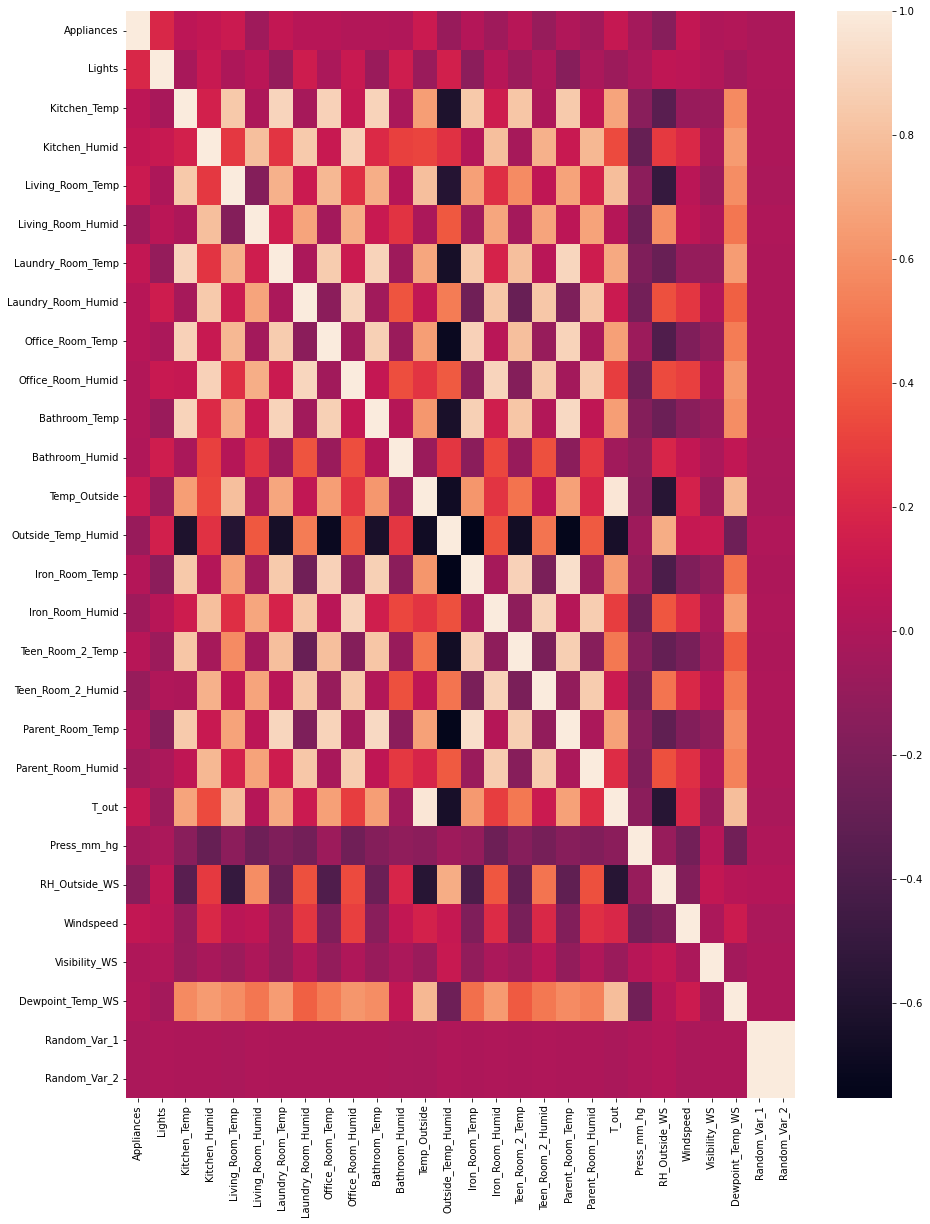

In [41]:
plt.figure(figsize=(15,20))
sns.heatmap(Correlation)
plt.show()

<AxesSubplot:>

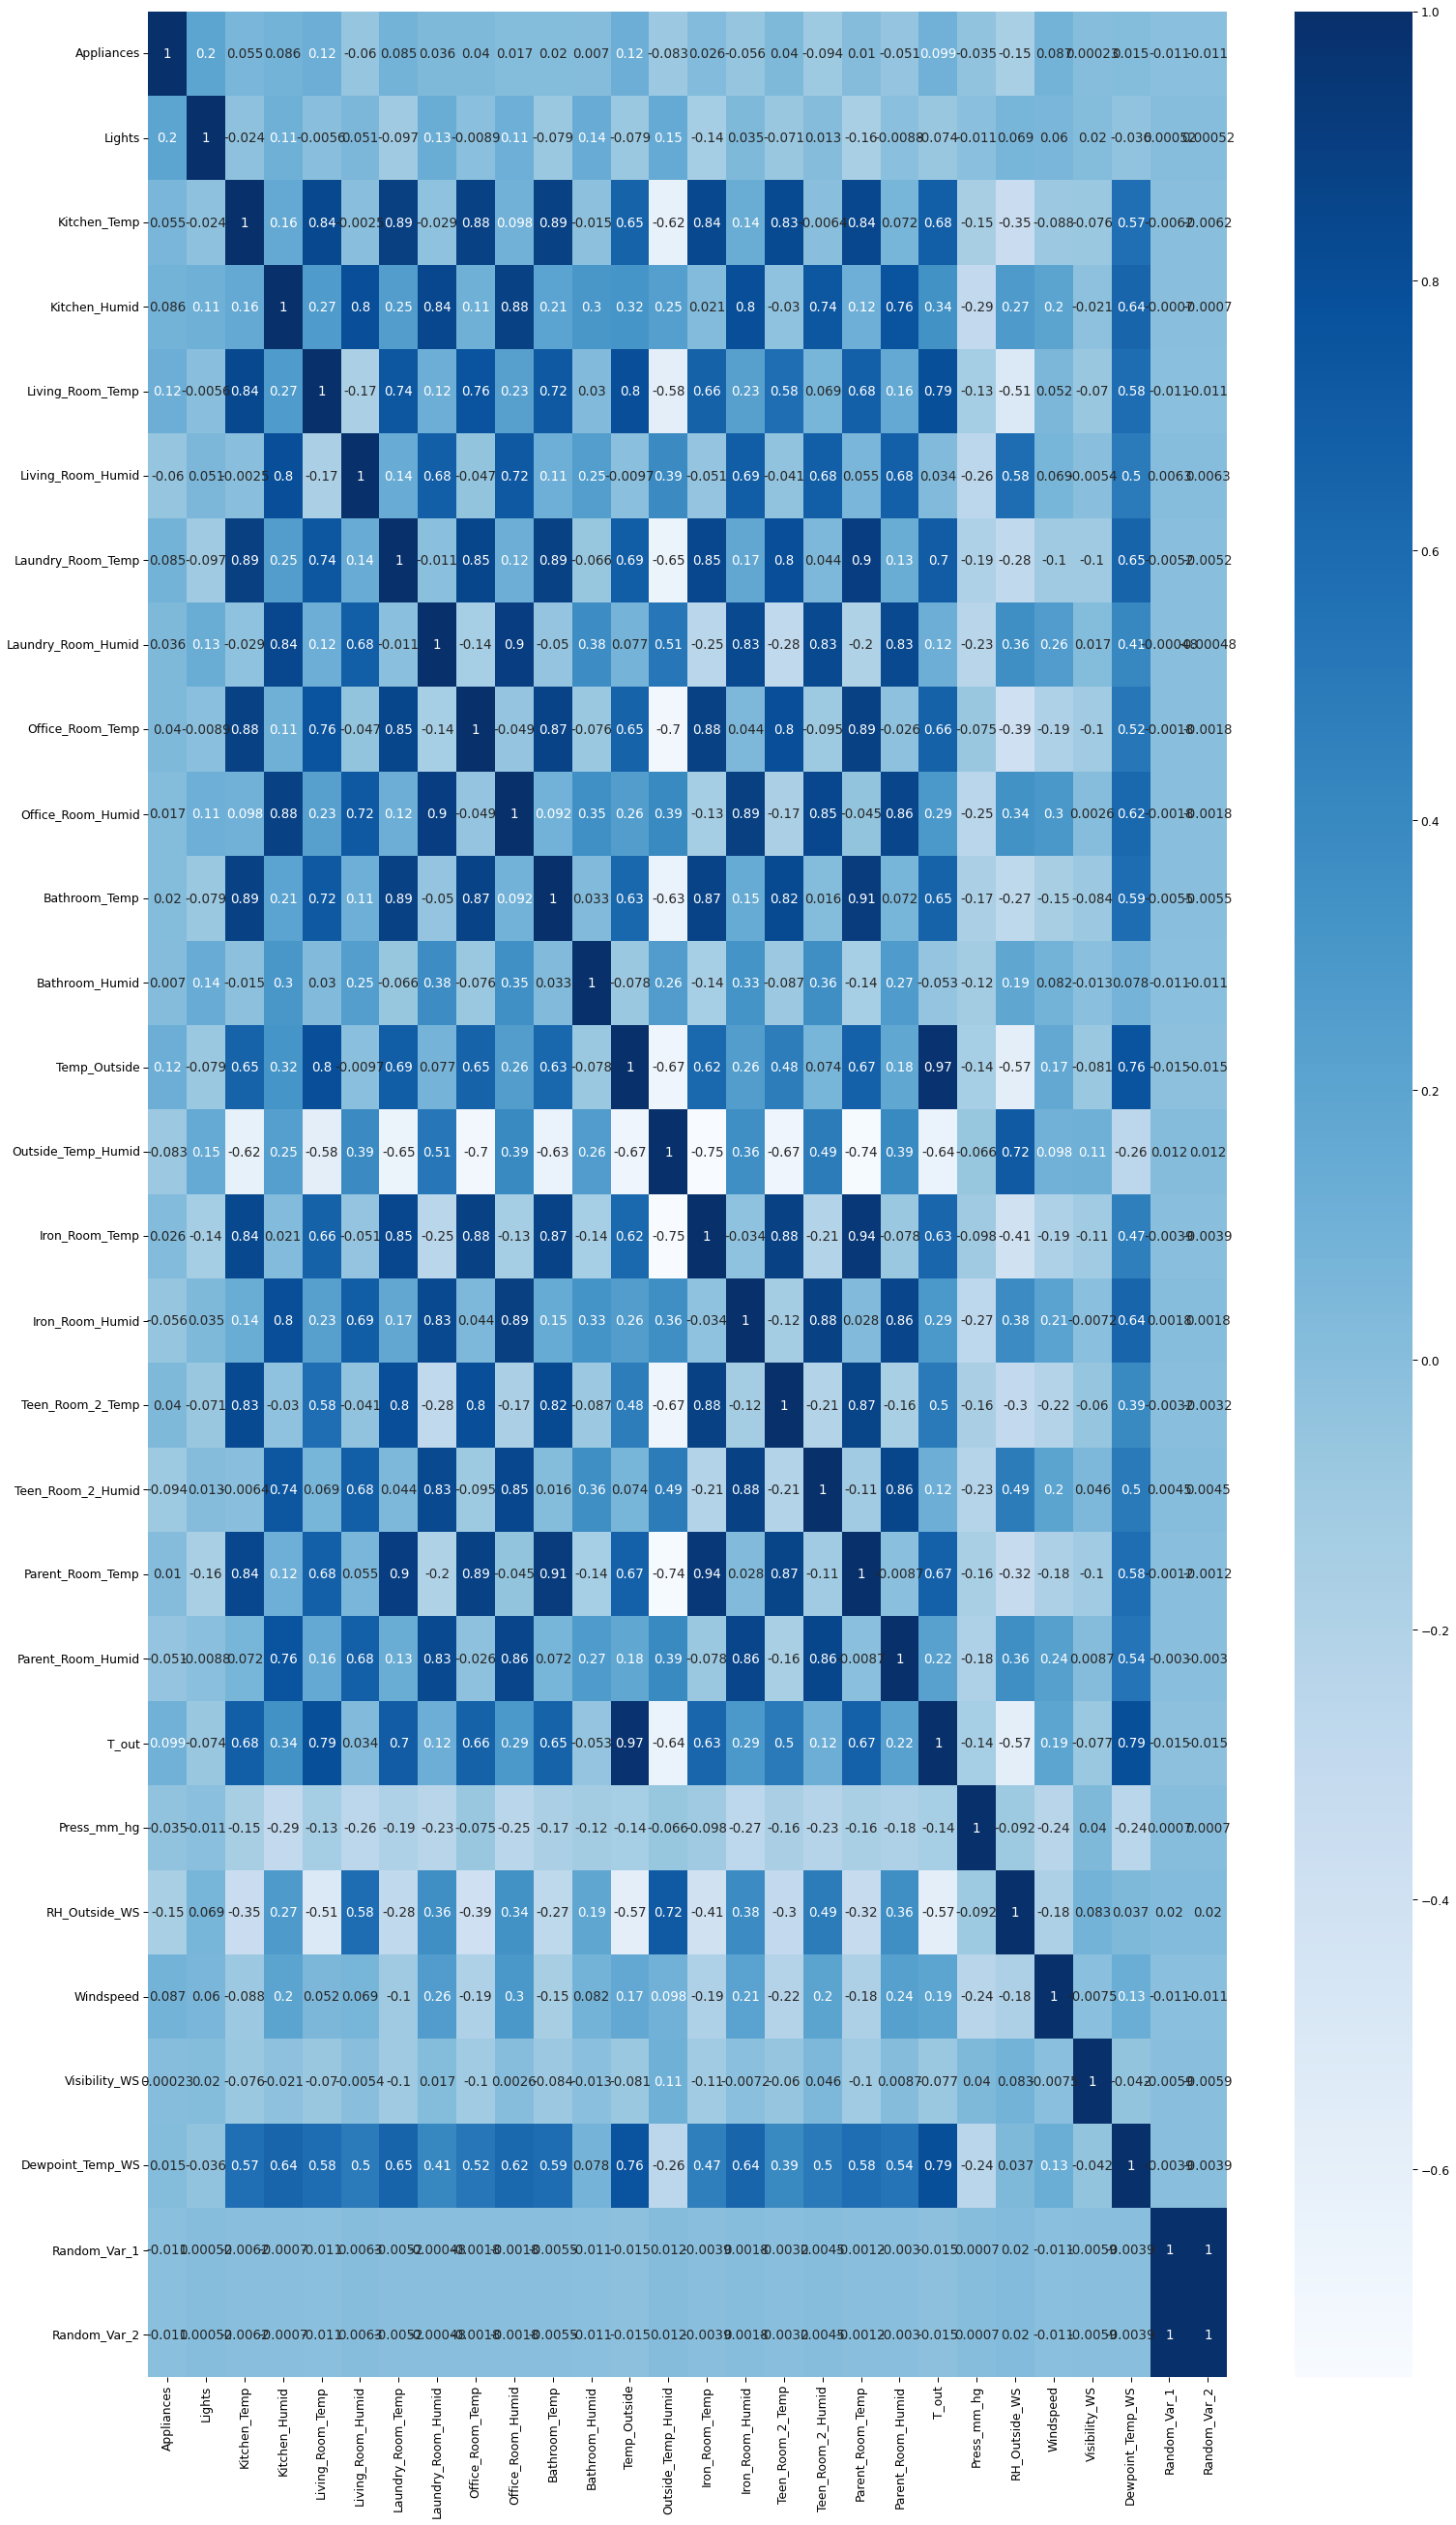

In [46]:
plt.figure(figsize=(25,45))
sns.set_context('paper', font_scale=1.4)

Energy_mtx = Energy.corr()  #The greater the value of a variable is to 1, the greater the correlation

sns.heatmap(Energy_mtx, annot=True, cmap='Blues')

In [54]:
#Drop the 'date' and 'lights' columns

Energy = Energy.drop(['Date', 'Lights'], axis = 1) 
Energy.head()

,Appliances,Kitchen_Temp,Kitchen_Humid,Living_Room_Temp,Living_Room_Humid,Laundry_Room_Temp,Laundry_Room_Humid,Office_Room_Temp,Office_Room_Humid,Bathroom_Temp,...,Parent_Room_Temp,Parent_Room_Humid,T_out,Press_mm_hg,RH_Outside_WS,Windspeed,Visibility_WS,Dewpoint_Temp_WS,Random_Var_1,Random_Var_2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [79]:
#Normalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Energy_scaled = pd.DataFrame(scaler.fit_transform(Energy),  columns = Energy.columns)

#get features and labels
X = Energy_scaled.drop(columns=['Appliances'])

y = Energy_scaled['Appliances']

In [80]:
#Split the train and test data

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (13814, 26)
y_train shape: (13814,)
X_test shape: (5921, 26)
y_test shape: (5921,)


In [81]:
#Select a sample of the dataset
Sample_df = Energy_scaled[['Living_Room_Temp', 'Temp_Outside']]



In [82]:
Sample_df.head()

,Living_Room_Temp,Temp_Outside
0,0.225345,0.381070
1,0.225345,0.375443
2,0.225345,0.367487
3,0.225345,0.363800
4,0.225345,0.361859


In [83]:
#Reshape sample dataset
x= Sample_df['Living_Room_Temp'].values.reshape(-1,1)
y = Sample_df['Temp_Outside'].values.reshape(-1,1)


In [84]:
#split sample dataset into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)


In [85]:

#linear model on sample of dataset
from sklearn import linear_model


lin_regr = linear_model.LinearRegression()

# Train the model using the training sets
lin_regr.fit(xtrain, ytrain)

# Make predictions using the testing set
pred = lin_regr.predict(xtest)

In [86]:
#R-squared or Coefficient of determination
from sklearn.metrics import r2_score

r2_score = r2_score(ytest, pred)
print('R-squared:',(round(r2_score, 2)))

R-squared: 0.64


### Trying a Linear Model on the Dataset

In [87]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
energy_pred = regr.predict(X_test)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

Training set score: 0.145
Test set score: 0.149


In [88]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, energy_pred)

print('MAE:',(round(mae, 2)))

#rss
import numpy as np
rss = np.sum(np.square(y_test - energy_pred))
print('RSS:',(round(rss, 2)))

#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, energy_pred))
print('RMSE:',(round(rmse, 3)))

#R-squared or coefficient of determination
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, energy_pred)
print('R-squared:',(round(r2_score, 2)))

MAE: 0.05
RSS: 45.35
RMSE: 0.088
R-squared: 0.15


In [89]:
#comparing the effects of regularisation


def get_weights_df(model, feat, col_name):
    
  #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df

In [90]:
#weights of linear model
linear_model_weights = get_weights_df(regr, X_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,Living_Room_Humid,-0.456698
1,T_out,-0.321860
2,Living_Room_Temp,-0.236178
3,Parent_Room_Temp,-0.189941
4,Teen_Room_2_Humid,-0.157595
5,RH_Outside_WS,-0.077671
6,Iron_Room_Humid,-0.044614
7,Parent_Room_Humid,-0.039800
8,Bathroom_Temp,-0.015657
9,Kitchen_Temp,-0.003281


### Ridge Regression (L2)

In [92]:

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

#obtain predictions
ridge_pred = ridge_reg.predict(X_test)

print("Training set score: {:.3f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge_reg.score(X_test, y_test)))

Training set score: 0.145
Test set score: 0.149


In [93]:
#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('RMSE:',(round(rmse, 3)))

RMSE: 0.088


In [72]:
#There is no change in the root meas squared error since the rmse for the linear model is also 0.088

### Lasso Regression(L1)

In [94]:

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

#obtain predictions
lasso_pred = lasso_reg.predict(X_test)

print("Training set score: {:.3f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso_reg.score(X_test, y_test)))

Training set score: 0.025
Test set score: 0.027


In [95]:

#Lasso regression weights
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_Outside_WS,-0.049557
1,Teen_Room_2_Humid,-0.000110
2,Kitchen_Temp,0.000000
3,Dewpoint_Temp_WS,0.000000
4,Visibility_WS,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,Parent_Room_Humid,-0.000000
8,Parent_Room_Temp,-0.000000
9,Teen_Room_2_Temp,0.000000


In [97]:
#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('RMSE:',(round(rmse, 3)))

RMSE: 0.094
